<div style="width:90%;">
    <h1 style="color:black;">Benchmark Problem #1</h1>
    <p style="color:black; text-align:justify;">The experiments chosen for this benchmark were conducted at the O. H. Hinsdale Wave Research Laboratory at Oregon State University to measure the debris movement and tsunami inundation over an unobstructed beach in a directional wave basin (DWB). The debris consisted of rectangular plywood boxes and were placed unconstrained on a flat section raised above the basin floor with no still water on the raised section. An image processing technique was developed for measuring the position and orientation of multiple debris specimens using a unique color scheme for the box lids. Seven model configurations were tested based on three main characteristics, including the number of boxes, the induced rotation, and the segmentation of groups. The combination of wire resistance wave gauges (WGs) and ultrasonic wave gauges (USWGs) were used to capture the free surface information. For Kinematic Trials, the USWG4 was collocated with an acoustic-Doppler velocimeter (ADV2).
Complete details of the experiment can be found in the accompanying journal paper:<br><br>   
        <a href="https://ascelibrary.org/doi/full/10.1061/%28ASCE%29WW.1943-5460.0000267">Rueben M, Cox D, Holman R, Shin S, Stanley J. Optical measurements of tsunami inundation and debris movement in a large-scale wave basin. Journal of Waterway, Port, Coastal, and Ocean Engineering. 2015 Jan 1;141(1):04014029.</a><br><br>
The following figure shows the schematic diagrams of the seven box configurations used in the experiments; white boxes are free to move along the floor and gray stationary box is fixed. For this benchmark, we will focus on configurations 3, 4, and 12.
    </p>
</div>

<figure>
  <img src="1.jpg" style="width:70%">
  <figcaption style="text-align:center; font-size:90%;">Figure 1. Schematic diagrams of the seven box configurations</figcaption>
</figure>

<div><b>Download dataset: </b><a href="url">all_data.zip</a></div>

<div style="width:90%;">
    <h2 style="font-size:large;">Experiment Setup</h2>
    <ul>
        <li><p style="color:black; text-align:justify;">
            <b>Basin: </b>
            Rectangular shape with the dimensions of 48.8 m long, 26.5 m wide and 2.1 m high. The depth and slope of different sections are shown in Figure 2.</li>
        <figure>
            <img src="2.jpg" style="width:90%">
            <figcaption style="text-align:center; font-size:90%;">Figure 2. Elevation view of the basin including sections depth and slope</figcaption>
        </figure><br>
        <li><p style="color:black; text-align:justify;">
            <b>Box size: </b>
            Each box has a nominal footprint of 60 cm by 60 cm and is 40 cm tall
        </li><br>
        <li><p style="color:black; text-align:justify;">
            <b>Water depth @ Wavemaker: </b>
            90.56 cm
        </li><br>
        <li><p style="color:black; text-align:justify;">
            <b>Incident wave: </b>
            The generated wave for this problem is not a solitary wave. It is custom wave meant to maximize the stroke of the wavemaker, while generating a long period wave. Note that due to this generation approach, the wave is not permanent, like a solitary wave. Numerically, the wave can be generated using two different methods:
            <ol>
                <li><p style="color:black; text-align:justify;">
                    The wavemaker displacement time series can be used if a moving wall boundary condition is available in the numerical model.
                </li><br>
                <li><p style="color:black; text-align:justify;">
                    The time series of incident wave elevation at WG2 can be used to force the numerical model at X=2.26 m.
                </li>
            </ol><br>
            Both of these time series can be seen and plotted using the " incident_wave.m" script in the "wave_generation" directory (see image below).
        </li>
    </ul>

</div>

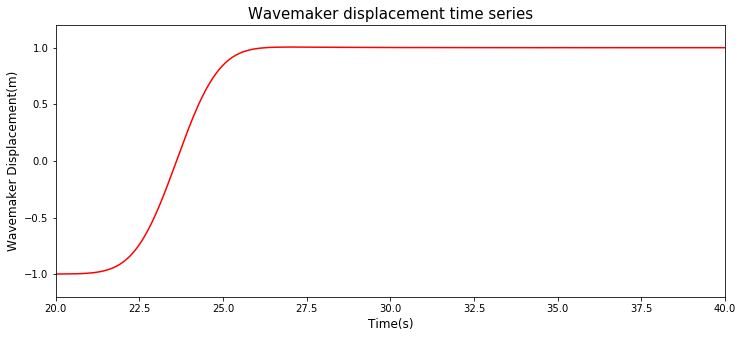

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('wmdisp.txt', sep='\t')
new_df = df[df['wmstart']>4].reset_index()
new_df['time'] -= new_df['time'][0]

fig = plt.figure(figsize=(12, 5))
plt.plot(new_df['time'], new_df['wmdisp15']*0.23, color='red')
plt.title('Wavemaker displacement time series', fontsize=15)
plt.xlabel('Time(s)',fontsize=12)
plt.ylabel('Wavemaker Displacement(m)', fontsize=12)
plt.xlim(20,40)
plt.ylim(-1.2,1.2)
plt.show()

<div style="width:90%;">
    <h2 style="font-size:large;">Benchmark Data</h2><br>
    The following data(in directory "comparison_data") should be compared with the numerical model output.
    <ul>
        <li><p style="color:black; text-align:justify;">
            <b>Free surface elevation data at WG2 and WG6 </b><br>
            This data is contained in the file: "Wavegages.txt” and can be plotted with the script load_WG2_WG6.m. The location of the wave gage is shown below (see also included journal paper). Note that there is other data included in these files as well. Modelers may compare with any data they wish, but please be sure to show comparisons at WG2 and WG6. Comparisons at this particular location will be used to ensure that the generated waves in the model are correct, in terms of amplitude, period, and arrival time.</li>
        <figure>
            <img src="4.jpg" style="width:90%; margin-left:5%;">
            <figcaption style="text-align:center; font-size:90%;">Figure 4. Basin plan view including locations of the gauges and the velocimeter</figcaption>
        </figure><br>
    </ul>
</div>

<table style="width:70%; margin-left:12%;">
    <caption style="color:black; text-align:center; font-size:110%;">Table 1. Instrument locations (wave gauges and velocimeter)</caption>
    <tr>
    <th style="text-align: center; font-size:small; width:20%;">Instrument</th>
    <th style="text-align: center; font-size:small; width:40%;">Instrument description</th>
    <th style="text-align: center; font-size:small;">x (m)</th>
    <th style="text-align: center; font-size:small;">y (m)</th>
    <th style="text-align: center; font-size:small;">z (m)</th>
  </tr>
  <tr>
    <td style="text-align: center;">WMDISP</td>
    <td style="text-align: center;">Wave maker displacement</td>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">0.00</td>
    <td style="text-align: center;">-</td>
  </tr>
  <tr>
    <td style="text-align: center;">WMWG</td>
    <td style="text-align: center;">Wave maker wave gauge</td>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">0.00</td>
    <td style="text-align: center;">-</td>
  </tr>
  <tr>
    <td style="text-align: center;">WG2</td>
    <td style="text-align: center;">Resistive wave gauge</td>
    <td style="text-align: center;">2.26</td>
    <td style="text-align: center;">0.98</td>
    <td style="text-align: center;">-</td>
  </tr>
  <tr>
    <td style="text-align: center;">WG4</td>
    <td style="text-align: center;">Resistive wave gauge</td>
    <td style="text-align: center;">9.55</td>
    <td style="text-align: center;">0.55</td>
    <td style="text-align: center;">-</td>
  </tr>
  <tr>
    <td style="text-align: center;">WG6</td>
    <td style="text-align: center;">Resistive wave gauge</td>
    <td style="text-align: center;">19.22</td>
    <td style="text-align: center;">0.56</td>
    <td style="text-align: center;">-</td>
  </tr>
  <tr>
    <td style="text-align: center;">USWG3</td>
    <td style="text-align: center;">Ultrasonic wave gauge</td>
    <td style="text-align: center;">30.68</td>
    <td style="text-align: center;">-3.20</td>
    <td style="text-align: center;">0.93</td>
  </tr>
  <tr>
    <td style="text-align: center;">USWG4</td>
    <td style="text-align: center;">Ultrasonic wave gauge</td>
    <td style="text-align: center;">31.89</td>
    <td style="text-align: center;">0.54</td>
    <td style="text-align: center;">1.00</td>
  </tr>
  <tr>
    <td style="text-align: center;">ADV2</td>
    <td style="text-align: center;">Acoustic-Doppler velocimeter</td>
    <td style="text-align: center;">31.89</td>
    <td style="text-align: center;">0.54</td>
    <td style="text-align: center;">1.00</td>
  </tr>
</table>

Text(0, 0.5, 'WG6(m)')

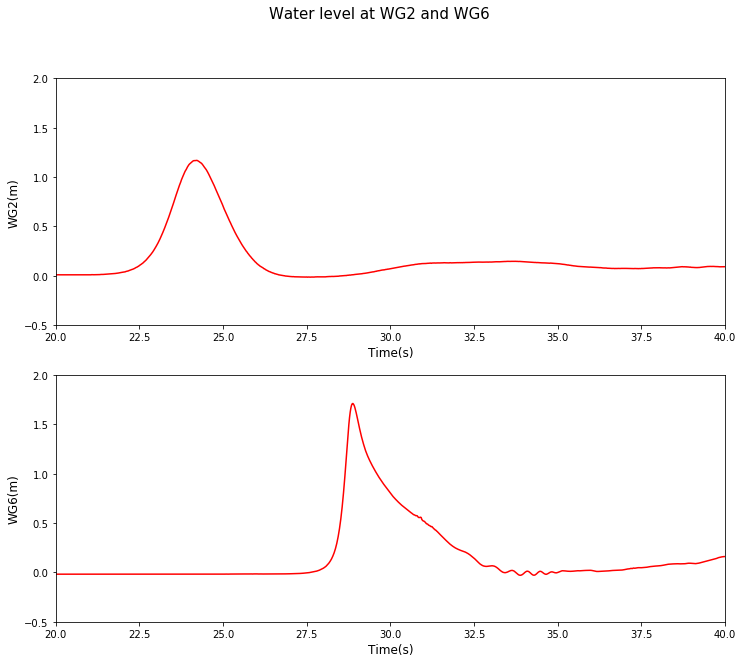

In [3]:
df_wave = pd.read_csv('gauge_data.txt', sep='\t')
new_df_wave = df_wave[df_wave['wmstart']>4].reset_index()
new_df_wave['time'] -= new_df_wave['time'][0]

fig, axs = plt.subplots(2, figsize=(12, 10))
fig.suptitle('Water level at WG2 and WG6', fontsize=15)
axs[0].plot(new_df_wave['time'], new_df_wave['wg2']-new_df_wave['wg1'][0], color='red')
axs[0].set_xlim(20,40)
axs[0].set_ylim(-0.5,2)
axs[0].set_xlabel('Time(s)', fontsize=12)
axs[0].set_ylabel('WG2(m)', fontsize=12)
axs[1].plot(new_df_wave['time'], new_df_wave['wg6']-new_df_wave['wg5'][0], color='red')
axs[1].set_xlim(20,40)
axs[1].set_ylim(-0.5,2)
axs[1].set_xlabel('Time(s)', fontsize=12)
axs[1].set_ylabel('WG6(m)', fontsize=12)

Text(0, 0.5, 'ADV2(m/s)')

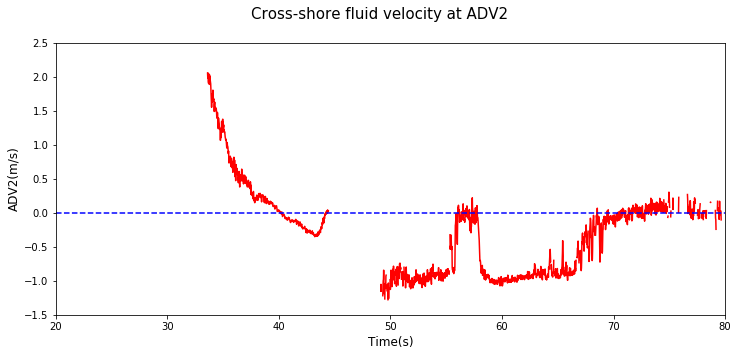

In [38]:
df_vel = pd.read_csv('Trial15_ADV2.txt', sep='\t')

fig, axs = plt.subplots(1, figsize=(12, 5))
fig.suptitle('Cross-shore fluid velocity at ADV2', fontsize=15)
axs.plot(df_vel['t(s)'], df_vel['u_despiked(m/s)'], 'r')
axs.plot([20,80], [0,0], 'b--')
axs.set_xlim(20,80)
axs.set_ylim(-1.5,2.5)
axs.set_xlabel('Time(s)', fontsize=12)
axs.set_ylabel('ADV2(m/s)', fontsize=12)

In [19]:
df_vel.head()

,t(s),u_raw(m/s),v_raw(m/s),w_raw(m/s),u_despiked(m/s),v_despiked(m/s),w_despiked(m/s)
0,0.00,0.000,0.000,0.000,NaN,NaN,NaN
1,0.02,2.516,0.385,0.922,NaN,NaN,NaN
2,0.04,0.974,0.789,4.159,NaN,NaN,NaN
3,0.06,2.516,0.385,2.685,NaN,NaN,NaN
4,0.08,1.514,0.661,1.062,NaN,NaN,NaN


<div style="width:90%;">
    <ul>
        <li><p style="color:black; text-align:justify;">
            <b>Path positions and cross-shore (X-direction) velocities</b><br>
            This data comparison is the primary task of this benchmark exercise. Here, we compare path positions and cross-shore (X-direction) velocities for box configurations 3, 4, and 12(Figure 1). 
Data for these locations can be plotted with the script "load_configs.m." The data is shown below. Note that there is data for other configurations as well (in "comparison_data/other"). Modelers may compare with any data they wish, but please be sure to show comparisons for configurations 3, 4, and 12.
</li><br>
        <figure>
            <img src="6.jpg" style="width:70%; margin-left:5%;">
            <figcaption style="text-align:center; font-size:90%;">Figure 6. Schematic diagrams of the box configurations 3, 4, and 12</figcaption>
        </figure><br>
    </ul>
</div>

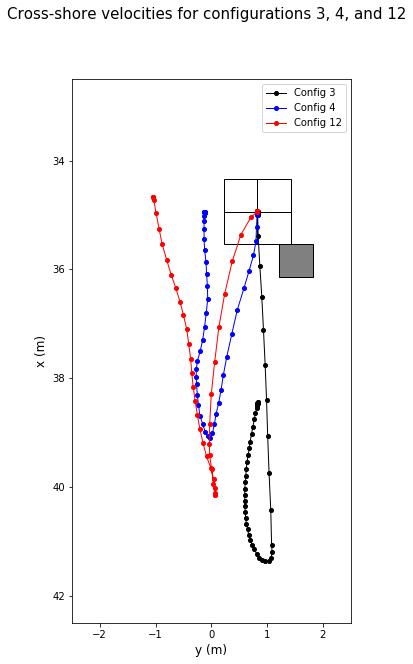

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

mat3 = scipy.io.loadmat('Config3.Track.mat')
mat3['results'][:,2,:] += 1.32
xy3 = np.mean(mat3['results'][:,[2,1],:], axis=0)

mat4 = scipy.io.loadmat('Config4.Track.mat')
mat4['results'][:,2,:] += 1.32
xy4 = np.mean(mat4['results'][:,[2,1],:], axis=0)

mat12 = scipy.io.loadmat('Config12.Track.mat')
mat12['results'][:,2,:] += 1.32
xy12 = np.mean(mat12['results'][:,[2,1],:], axis=0)

fig, axs = plt.subplots(1, figsize=(5, 10))
axs.add_patch(Rectangle((0.22, 34.34), 0.60, 0.60, edgecolor = 'black', fill=False))
axs.add_patch(Rectangle((0.82, 34.34), 0.60, 0.60, edgecolor = 'black', fill=False))
axs.add_patch(Rectangle((0.22, 34.94), 0.60, 0.60, edgecolor = 'black', fill=False))
axs.add_patch(Rectangle((0.82, 34.94), 0.60, 0.60, edgecolor = 'black', fill=False))
axs.add_patch(Rectangle((1.22, 35.54), 0.60, 0.60, edgecolor = 'black', facecolor='grey'))
axs.plot(xy3[0],xy3[1], 'o-k', lw=1, ms=4, label='Config 3')
axs.plot(xy4[0],xy4[1], 'o-b', lw=1, ms=4, label='Config 4')
axs.plot(xy12[0],xy12[1], 'o-r', lw=1, ms=4, label='Config 12')
fig.suptitle('Cross-shore velocities for configurations 3, 4, and 12', fontsize=15)

axs.set_xlim(-2.5,2.5)
axs.set_ylim(32.5,42.5)
axs.invert_yaxis()
axs.set_xlabel('y (m)', fontsize=12)
axs.set_ylabel('x (m)', fontsize=12)
axs.legend()

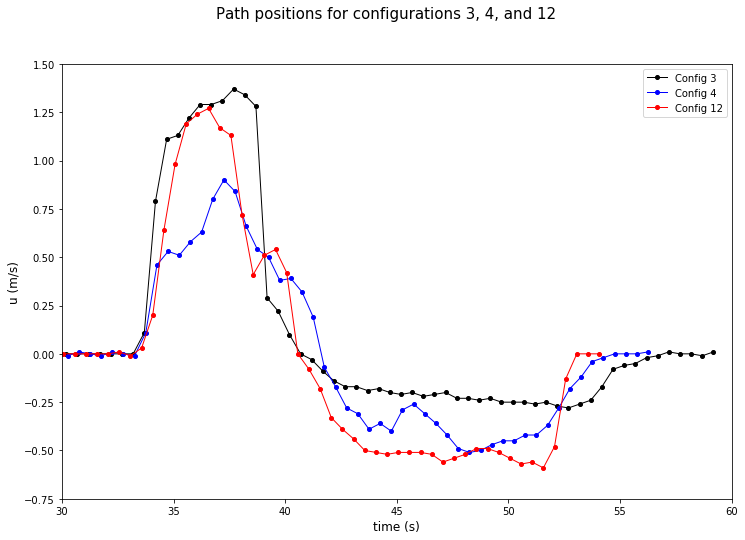

In [5]:
u3 = np.mean(np.diff(mat3['results'][:,1,:])/0.5, axis=0)
t3 = mat3['t'][:, :-1] + np.diff(mat3['t']/2)

u4 = np.mean(np.diff(mat4['results'][:,1,:])/0.5, axis=0)
t4 = mat4['t'][:, :-1] + np.diff(mat4['t']/2)

u12 = np.diff(xy12[1, :]/0.5, axis=0)
t12 = mat12['t'][:, :-1] + np.diff(mat12['t']/2)

fig, axs = plt.subplots(1, figsize=(12, 8))
axs.plot(t3[0], u3, 'o-k', lw=1, ms=4, label='Config 3')
axs.plot(t4[0], u4, 'o-b', lw=1, ms=4, label='Config 4')
axs.plot(t12[0], u12, 'o-r', lw=1, ms=4, label='Config 12')
fig.suptitle('Path positions for configurations 3, 4, and 12', fontsize=15)
axs.set_xlim(30,60)
axs.set_ylim(-0.75,1.5)
axs.set_xlabel('time (s)', fontsize=12)
axs.set_ylabel('u (m/s)', fontsize=12)
axs.legend()